<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Project-Information" data-toc-modified-id="Project-Information-1">Project Information</a></span><ul class="toc-item"><li><span><a href="#Import-Libraries" data-toc-modified-id="Import-Libraries-1.1">Import Libraries</a></span></li><li><span><a href="#Import-and-Examine-the-Data" data-toc-modified-id="Import-and-Examine-the-Data-1.2">Import and Examine the Data</a></span><ul class="toc-item"><li><span><a href="#Change-Column-Names-to-Lower-Case-for-Ease-of-Use" data-toc-modified-id="Change-Column-Names-to-Lower-Case-for-Ease-of-Use-1.2.1">Change Column Names to Lower Case for Ease of Use</a></span></li><li><span><a href="#Deal-with-Columns-w/-Strings" data-toc-modified-id="Deal-with-Columns-w/-Strings-1.2.2">Deal with Columns w/ Strings</a></span></li><li><span><a href="#Re-examine-Data-now-that-Everything-is-Numeric-or-Boolean" data-toc-modified-id="Re-examine-Data-now-that-Everything-is-Numeric-or-Boolean-1.2.3">Re-examine Data now that Everything is Numeric or Boolean</a></span></li></ul></li><li><span><a href="#Feature-Engineering" data-toc-modified-id="Feature-Engineering-1.3">Feature Engineering</a></span></li><li><span><a href="#Split-Data-into-two-Groups,-One-for-Intervention-and-for-Control" data-toc-modified-id="Split-Data-into-two-Groups,-One-for-Intervention-and-for-Control-1.4">Split Data into two Groups, One for Intervention and for Control</a></span></li><li><span><a href="#Modeling" data-toc-modified-id="Modeling-1.5">Modeling</a></span></li><li><span><a href="#Dropping-Null-Values" data-toc-modified-id="Dropping-Null-Values-1.6">Dropping Null Values</a></span></li></ul></li></ul></div>

# Project Information

---

**_Dataset Information_**

- The dataset contains information about two sets of hospitals, one that participated in a policy intervention designed to improve patient safety `(Treatment = TRUE)`, and one that did not, `(Treatment = FALSE)`.
- The goal was to reduce central-line associated blood stream infections (CLABSIs), with lower rates being more desirable. The policy was implemented at the beginning of 2016. 
- The pre-intervention results are in the `SIR15` column, and the post-intervention results are in the `SIR16` column. 
- One tab in the Excel file has the data `(HOSPITAL_SAFETY)`, and the other has information on the data `(Data dictionary)`.

---

**_Tasks_**

**We would like you to complete the following tasks:**

* Complete an initial analysis of the data to estimate the effect of the intervention on CLABSI rates. (This could include EDA and modeling.)
* Communicate your findings to your larger MPR team via a high-level, not-highly-technical email to your colleagues informing them of the results.
* Include the code you used to run your analysis.

---

**_Guidelines_**

* Assume your team can use the following types of files: R, R markdown, Python, Jupyter notebook, Microsoft Office Suite, PDF.
* You may use any libraries available for R or Python to complete your analysis.
* **Prioritize including one or two visualizations or tables that help drive home your findings over lots of prose.**
* You may include a list of analytic next steps as part of the email to your team.

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

#!pip install jupyternotify
import jupyternotify
ip = get_ipython()
ip.register_magics(jupyternotify.JupyterNotifyMagics)
## Run %%notify to create notification for completed cell

<IPython.core.display.Javascript object>

## Import and Examine the Data

In [2]:
df = pd.read_excel('HOSPITAL_SAFETY.xlsx', sheet_name=0)
column_info = pd.read_excel('HOSPITAL_SAFETY.xlsx', sheet_name=1, header=None)

### Change Column Names to Lower Case for Ease of Use

In [3]:
# Change column names to lower case for ease of use
low_cols = []
for col in df.columns:
    low_cols.append(col.lower())
low_cols[0] = 'hosp_id'
df.columns = low_cols

In [4]:
# Examine what each column is and consider why it could be of value
for i in range(len(column_info)):
    print(column_info.at[i,0].lower())
    print(column_info.at[i,1])
    print()

hosp.id
Hospital Identifier

name
Hospital name

county
Hospital geographic county

region
US Census Division

urban_rural
Defines whether hospital is in an urban or rural location

wage_index
Measures cost of labor in a geographic area, where higher values translates to more expensive staff/higher salaries

resident_to_beds
Number of medical students per hospital beds

beds
Number of beds available for patients at the hospital

dshpct
Measures the proportion of poor, elderly, frail, or disables patients at a hospital, where higher values indicate greater proportions

cost_to_charge
A measure of profit, where higher values equal greater profit margins

annual_volume
Number of patients seen at the hospital in a given year

casemix
Measures patient sickness, where higher levels correspond to sicker or more complex patients

type
Hospital type

ownership
Hospital ownership

emergency_services
Emergency services available at this hospital

uses_ehrs
Uses approved electronic health records


In [5]:
df.head()

,hosp_id,name,county,region,urban_rural,wage_index,resident_to_beds,beds,dshpct,cost_to_charge,...,casemix,type,ownership,emergency_services,uses_ehrs,denom16,sir16,denom15,sir15,treatment
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1340,5,OURBAN,0.7704,0.0,408,0.29862,0.197,...,1.750650,Acute Care Hospitals,Government - Hospital District or Authority,True,1.0,7264.0,0.688,7117.0,2.816,1.0
1,10005,MARSHALL MEDICAL CENTER SOUTH,1470,5,RURAL,0.8212,0.0,204,0.27654,0.303,...,1.343089,Acute Care Hospitals,Government - Hospital District or Authority,True,1.0,2464.0,0.000,2786.0,2.114,0.0
2,10006,ELIZA COFFEE MEMORIAL HOSPITAL,1380,5,OURBAN,0.7325,0.0,358,0.24028,0.186,...,1.668372,Acute Care Hospitals,Government - Hospital District or Authority,True,1.0,8711.0,1.563,11159.0,0.639,0.0
3,10007,MIZELL MEMORIAL HOSPITAL,1190,5,RURAL,0.6874,0.0,78,0.19347,0.368,...,1.012308,Acute Care Hospitals,Voluntary non-profit - Private,True,1.0,282.0,NaN,48.0,NaN,0.0
4,10008,CRENSHAW COMMUNITY HOSPITAL,1200,5,RURAL,0.6973,0.0,29,0.36918,0.493,...,0.928597,Acute Care Hospitals,Proprietary,True,1.0,55.0,NaN,28.0,NaN,1.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 21 columns):
hosp_id               3263 non-null int64
name                  3262 non-null object
county                3263 non-null int64
region                3263 non-null int64
urban_rural           3263 non-null object
wage_index            3263 non-null float64
resident_to_beds      3263 non-null float64
beds                  3263 non-null int64
dshpct                3263 non-null float64
cost_to_charge        3263 non-null float64
annual_volume         3263 non-null int64
casemix               3263 non-null float64
type                  3263 non-null object
ownership             3263 non-null object
emergency_services    3263 non-null bool
uses_ehrs             3207 non-null float64
denom16               3040 non-null float64
sir16                 2005 non-null float64
denom15               3038 non-null float64
sir15                 2038 non-null float64
treatment             3010 non

In [7]:
# Looking for null values that might need to be dropped or filled
df.isna().sum()

hosp_id                  0
name                     1
county                   0
region                   0
urban_rural              0
wage_index               0
resident_to_beds         0
beds                     0
dshpct                   0
cost_to_charge           0
annual_volume            0
casemix                  0
type                     0
ownership                0
emergency_services       0
uses_ehrs               56
denom16                223
sir16                 1258
denom15                225
sir15                 1225
treatment              253
dtype: int64

### Deal with Columns w/ Strings
Columns that have text will need to be dealt with

In [8]:
for col in df.columns:
    if df[col].dtype == 'O':
        print(col)

name
urban_rural
type
ownership


In [9]:
# Examine the name column, which represents the name of the hospital
df.name.nunique() # Too many different values, likely unimportant for analysis and can be DROPPED

3148

In [10]:
# Examine the relationship between urban and rural hospitals
df.urban_rural.value_counts() # Column can be encoded since it is categorical

LURBAN    1364
OURBAN    1109
RURAL      790
Name: urban_rural, dtype: int64

In [11]:
# Types of hospitals are all Acute Care Hospitals
df.type.nunique() # Column can be DROPPED since there is only one value in this column

1

In [12]:
df.ownership.value_counts() # Column can likely be encoded since there are 10 different unique values
# Ownership might be something to look at in the long term, but likely not important in short term with less data?

Voluntary non-profit - Private                 1374
Proprietary                                     681
Voluntary non-profit - Other                    355
Voluntary non-profit - Church                   269
Government - Hospital District or Authority     268
Government - Local                              169
Physician                                        60
Government - State                               47
Government - Federal                             35
Tribal                                            5
Name: ownership, dtype: int64

In [13]:
# Drop the name and type columns
drops = ['name', 'type']
df = df.drop(columns=drops)

In [14]:
# Manually encode the urban/rural column and the ownership column
df.urban_rural = df.urban_rural.replace({'LURBAN': 2, 'OURBAN': 1, 'RURAL': 0})
df.ownership = df.ownership.replace({'Voluntary non-profit - Private': 9, 
                                     'Proprietary': 8, 
                                     'Voluntary non-profit - Other': 7,
                                     'Voluntary non-profit - Church': 6,
                                     'Government - Hospital District or Authority': 5,
                                     'Government - Local': 4,
                                     'Physician': 3,
                                     'Government - State': 2,
                                     'Government - Federal': 1,
                                     'Tribal': 0})

In [15]:
df.emergency_services = df.emergency_services.replace({True: 1, False: 0}) # Can likely be dropped later

In [16]:
df.uses_ehrs.value_counts() # Can be dropped since it's all 1.0 or NaN

1.0    3207
Name: uses_ehrs, dtype: int64

In [17]:
df.drop(columns='uses_ehrs', inplace=True)

### Re-examine Data now that Everything is Numeric or Boolean

In [18]:
df.head(10)

,hosp_id,county,region,urban_rural,wage_index,resident_to_beds,beds,dshpct,cost_to_charge,annual_volume,casemix,ownership,emergency_services,denom16,sir16,denom15,sir15,treatment
0,10001,1340,5,1,0.7704,0.0000,408,0.29862,0.197,7939,1.750650,5,1,7264.0,0.688,7117.0,2.816,1.0
1,10005,1470,5,0,0.8212,0.0000,204,0.27654,0.303,4036,1.343089,5,1,2464.0,0.000,2786.0,2.114,0.0
2,10006,1380,5,1,0.7325,0.0000,358,0.24028,0.186,5132,1.668372,5,1,8711.0,1.563,11159.0,0.639,0.0
3,10007,1190,5,0,0.6874,0.0000,78,0.19347,0.368,645,1.012308,9,1,282.0,NaN,48.0,NaN,0.0
4,10008,1200,5,0,0.6973,0.0000,29,0.36918,0.493,285,0.928597,8,1,55.0,NaN,28.0,NaN,1.0
5,10011,1360,5,2,0.8128,0.0525,279,0.22260,0.213,4092,1.719994,9,1,10339.0,1.413,12366.0,0.778,1.0
6,10012,1240,5,0,0.7091,0.0000,97,0.28320,0.152,1303,1.273982,8,1,1029.0,NaN,497.0,NaN,1.0
7,10016,1580,5,2,0.8128,0.0000,193,0.23648,0.176,3485,1.554720,9,1,7736.0,0.780,8088.0,0.833,1.0
8,10018,1360,5,2,0.8128,0.6225,12,0.21118,0.611,31,1.231280,9,1,NaN,NaN,NaN,NaN,NaN
9,10019,1160,5,1,0.7325,0.0000,185,0.29442,0.270,3084,1.344605,5,1,1748.0,1.645,1924.0,1.529,1.0


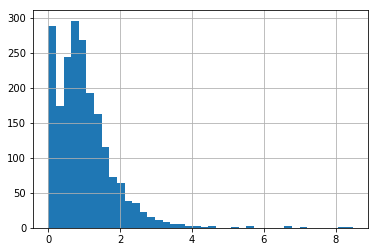

In [19]:
df.sir15.hist(bins = 40)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 18 columns):
hosp_id               3263 non-null int64
county                3263 non-null int64
region                3263 non-null int64
urban_rural           3263 non-null int64
wage_index            3263 non-null float64
resident_to_beds      3263 non-null float64
beds                  3263 non-null int64
dshpct                3263 non-null float64
cost_to_charge        3263 non-null float64
annual_volume         3263 non-null int64
casemix               3263 non-null float64
ownership             3263 non-null int64
emergency_services    3263 non-null int64
denom16               3040 non-null float64
sir16                 2005 non-null float64
denom15               3038 non-null float64
sir15                 2038 non-null float64
treatment             3010 non-null float64
dtypes: float64(10), int64(8)
memory usage: 458.9 KB


In [21]:
df.isna().sum()

hosp_id                  0
county                   0
region                   0
urban_rural              0
wage_index               0
resident_to_beds         0
beds                     0
dshpct                   0
cost_to_charge           0
annual_volume            0
casemix                  0
ownership                0
emergency_services       0
denom16                223
sir16                 1258
denom15                225
sir15                 1225
treatment              253
dtype: int64

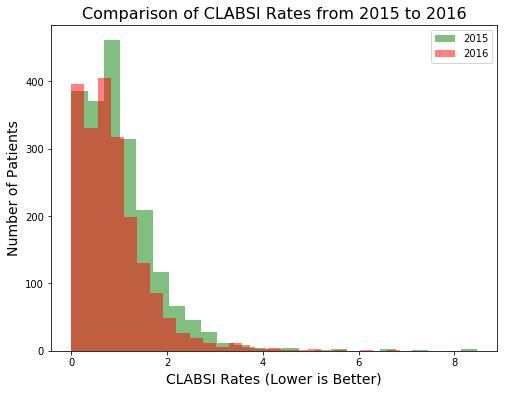

In [22]:
plt.figure(figsize=(8, 6))
plt.hist(df.sir15, color='g', alpha=0.5, bins=25, label='2015')
plt.hist(df.sir16, color='r', alpha=0.5, bins=25, label='2016')
plt.title('Comparison of CLABSI Rates from 2015 to 2016', fontsize=16)
plt.xlabel('CLABSI Rates (Lower is Better)', fontsize=14)
plt.ylabel('Number of Patients', fontsize=14)
plt.legend(loc=0)
plt.show()

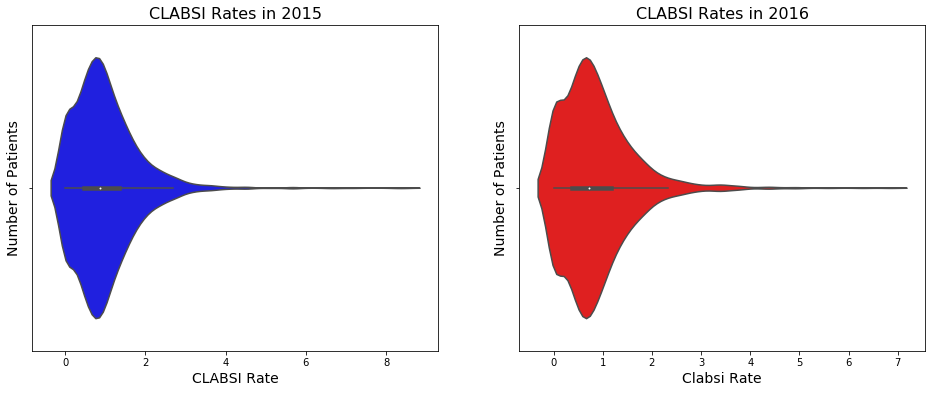

In [23]:
plt.figure(figsize=(16, 6))
plt.subplot(121)
sns.violinplot(df.sir15, color='b', alpha=0.4, bins=25, label='2015')
plt.title('CLABSI Rates in 2015', fontsize=16)
plt.xlabel('CLABSI Rate', fontsize=14)
plt.ylabel('Number of Patients', fontsize=14)
plt.subplot(122)
sns.violinplot(df.sir16, color='r', alpha=0.4, bins=25, label='2016')
plt.title('CLABSI Rates in 2016', fontsize=16)
plt.xlabel('Clabsi Rate', fontsize=14)
plt.ylabel('Number of Patients', fontsize=14)
plt.show()

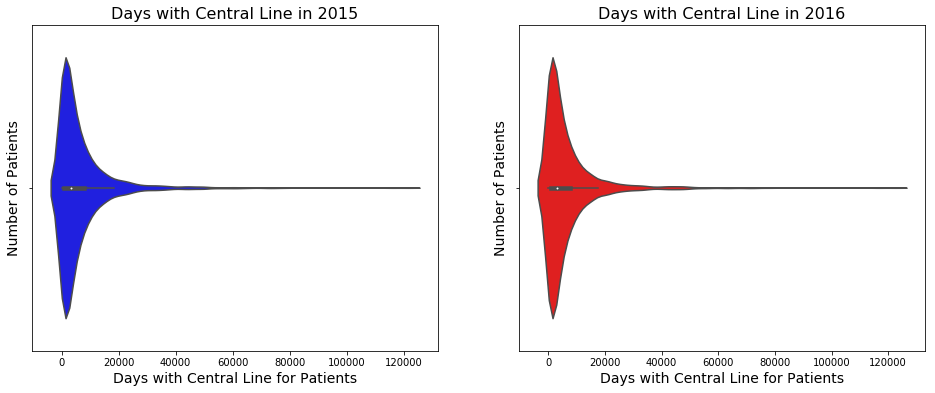

In [24]:
plt.figure(figsize=(16, 6))
plt.subplot(121)
sns.violinplot(df.denom15, color='b', alpha=0.4, bins=25, label='2015')
plt.title('Days with Central Line in 2015', fontsize=16)
plt.xlabel('Days with Central Line for Patients', fontsize=14)
plt.ylabel('Number of Patients', fontsize=14)
plt.subplot(122)
sns.violinplot(df.denom16, color='r', alpha=0.4, bins=25, label='2016')
plt.title('Days with Central Line in 2016', fontsize=16)
plt.xlabel('Days with Central Line for Patients', fontsize=14)
plt.ylabel('Number of Patients', fontsize=14)
plt.show()

In [25]:
df.head()

,hosp_id,county,region,urban_rural,wage_index,resident_to_beds,beds,dshpct,cost_to_charge,annual_volume,casemix,ownership,emergency_services,denom16,sir16,denom15,sir15,treatment
0,10001,1340,5,1,0.7704,0.0,408,0.29862,0.197,7939,1.750650,5,1,7264.0,0.688,7117.0,2.816,1.0
1,10005,1470,5,0,0.8212,0.0,204,0.27654,0.303,4036,1.343089,5,1,2464.0,0.000,2786.0,2.114,0.0
2,10006,1380,5,1,0.7325,0.0,358,0.24028,0.186,5132,1.668372,5,1,8711.0,1.563,11159.0,0.639,0.0
3,10007,1190,5,0,0.6874,0.0,78,0.19347,0.368,645,1.012308,9,1,282.0,NaN,48.0,NaN,0.0
4,10008,1200,5,0,0.6973,0.0,29,0.36918,0.493,285,0.928597,8,1,55.0,NaN,28.0,NaN,1.0


In [26]:
# Examine each column to see number of null and unique values each column has
for col in df.columns:
    print(col.title())
    print(df[col].isna().sum(), "null value(s)")
    print(df[col].nunique(), "unique value(s) out of 3263 rows of data")
    print()

Hosp_Id
0 null value(s)
3263 unique value(s) out of 3263 rows of data

County
0 null value(s)
1522 unique value(s) out of 3263 rows of data

Region
0 null value(s)
10 unique value(s) out of 3263 rows of data

Urban_Rural
0 null value(s)
3 unique value(s) out of 3263 rows of data

Wage_Index
0 null value(s)
567 unique value(s) out of 3263 rows of data

Resident_To_Beds
0 null value(s)
881 unique value(s) out of 3263 rows of data

Beds
0 null value(s)
638 unique value(s) out of 3263 rows of data

Dshpct
0 null value(s)
3130 unique value(s) out of 3263 rows of data

Cost_To_Charge
0 null value(s)
644 unique value(s) out of 3263 rows of data

Annual_Volume
0 null value(s)
2527 unique value(s) out of 3263 rows of data

Casemix
0 null value(s)
3263 unique value(s) out of 3263 rows of data

Ownership
0 null value(s)
10 unique value(s) out of 3263 rows of data

Emergency_Services
0 null value(s)
2 unique value(s) out of 3263 rows of data

Denom16
223 null value(s)
2534 unique value(s) out of 3

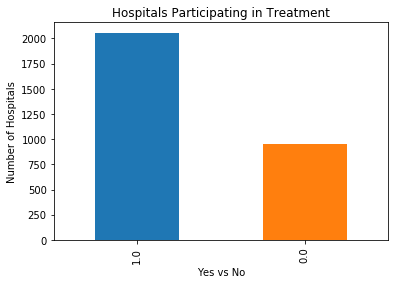

In [27]:
# Plot number of hospitals in Intervention
df.treatment.value_counts().plot(kind='bar')
plt.title('Hospitals Participating in Treatment')
plt.ylabel('Number of Hospitals')
plt.xlabel('Yes vs No')
plt.show()

In [28]:
# Looking at wage_index column info
print(column_info.at[5,0])
print(column_info.at[5,1])

WAGE_INDEX
Measures cost of labor in a geographic area, where higher values translates to more expensive staff/higher salaries


count    3263.000000
mean        0.978143
std         0.210130
min         0.397800
25%         0.842200
50%         0.931500
75%         1.032900
max         1.934300
Name: wage_index, dtype: float64


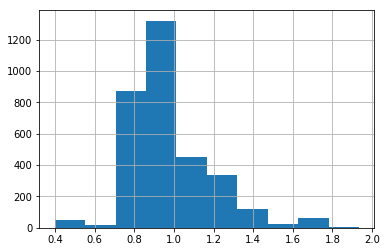

In [29]:
# Plot dispersion of wage_indexes, as well as descriptive statistics about the column
print(df.wage_index.describe())
df.wage_index.hist();

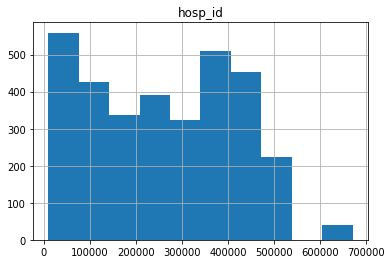

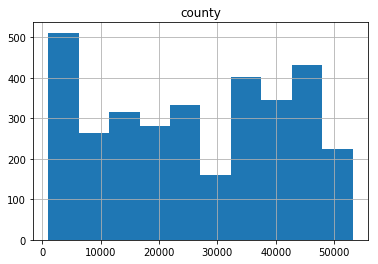

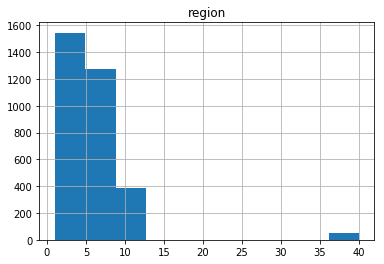

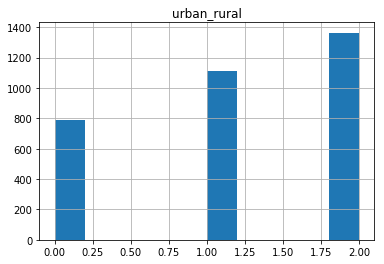

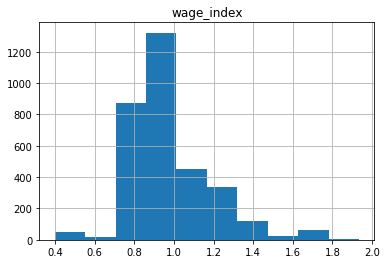

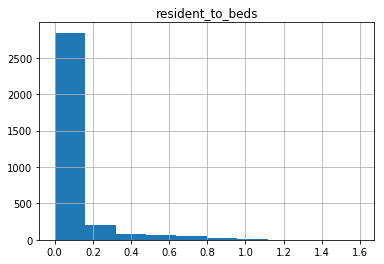

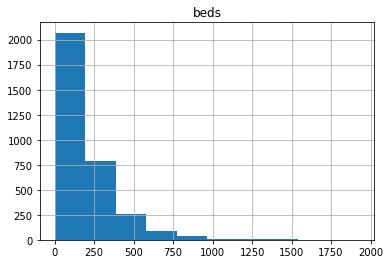

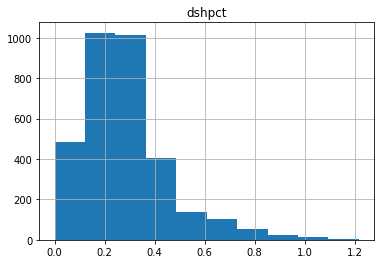

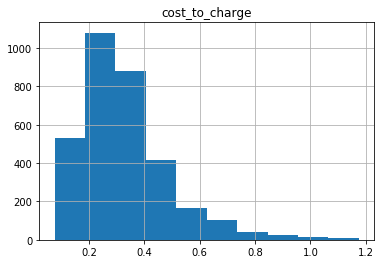

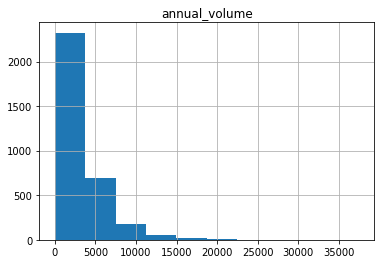

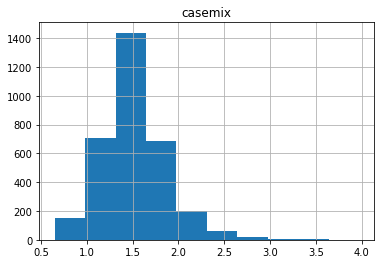

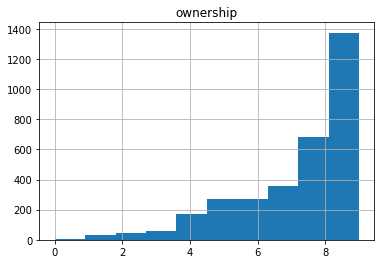

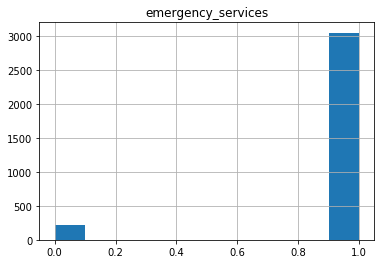

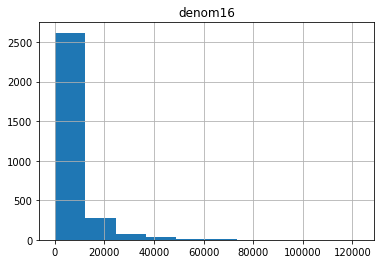

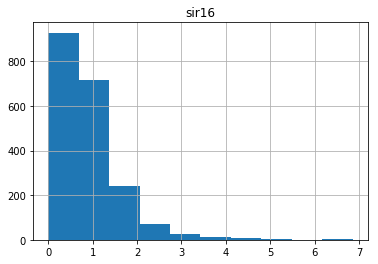

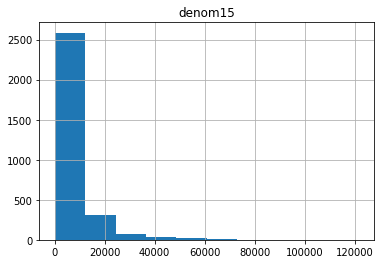

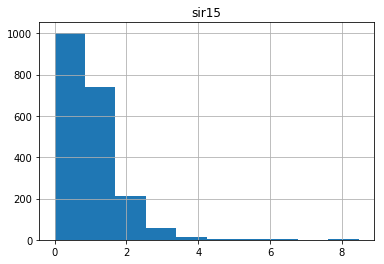

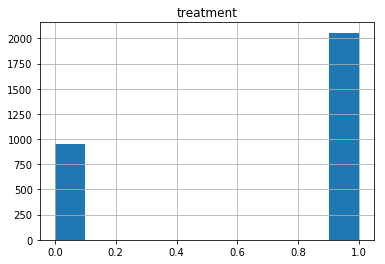

In [30]:
# Plot histograms to see dispersion of all values for each column
hist = df.describe()
cols = list(hist.columns)
for col in cols:
    df[col].hist()
    plt.title(col)
    plt.show()

In [31]:
df.head()

,hosp_id,county,region,urban_rural,wage_index,resident_to_beds,beds,dshpct,cost_to_charge,annual_volume,casemix,ownership,emergency_services,denom16,sir16,denom15,sir15,treatment
0,10001,1340,5,1,0.7704,0.0,408,0.29862,0.197,7939,1.750650,5,1,7264.0,0.688,7117.0,2.816,1.0
1,10005,1470,5,0,0.8212,0.0,204,0.27654,0.303,4036,1.343089,5,1,2464.0,0.000,2786.0,2.114,0.0
2,10006,1380,5,1,0.7325,0.0,358,0.24028,0.186,5132,1.668372,5,1,8711.0,1.563,11159.0,0.639,0.0
3,10007,1190,5,0,0.6874,0.0,78,0.19347,0.368,645,1.012308,9,1,282.0,NaN,48.0,NaN,0.0
4,10008,1200,5,0,0.6973,0.0,29,0.36918,0.493,285,0.928597,8,1,55.0,NaN,28.0,NaN,1.0


## Feature Engineering
What features can be engineered from this data?  Thoughts include:
- Change in rate of infection (`SIR15` to `SIR16`)
- Change in days with central line for patients' (`DENOM15` to `DENOM16`)
- Some new way of tracking the effect of better staff?  Perhaps something with (_urban/rural_, _wage index_, and _resident to beds_?

In [34]:
# Creating two new columns for the change in incidence rate and days with line inserted from 2015 to 2016
df['sir_diff'] = df['sir16'] - df['sir15']
df['denom_diff'] = df['denom16'] - df['denom15']

In [35]:
df.head(10)

,hosp_id,county,region,urban_rural,wage_index,resident_to_beds,beds,dshpct,cost_to_charge,annual_volume,casemix,ownership,emergency_services,denom16,sir16,denom15,sir15,treatment,sir_diff,denom_diff
0,10001,1340,5,1,0.7704,0.0000,408,0.29862,0.197,7939,1.750650,5,1,7264.0,0.688,7117.0,2.816,1.0,-2.128,147.0
1,10005,1470,5,0,0.8212,0.0000,204,0.27654,0.303,4036,1.343089,5,1,2464.0,0.000,2786.0,2.114,0.0,-2.114,-322.0
2,10006,1380,5,1,0.7325,0.0000,358,0.24028,0.186,5132,1.668372,5,1,8711.0,1.563,11159.0,0.639,0.0,0.924,-2448.0
3,10007,1190,5,0,0.6874,0.0000,78,0.19347,0.368,645,1.012308,9,1,282.0,NaN,48.0,NaN,0.0,NaN,234.0
4,10008,1200,5,0,0.6973,0.0000,29,0.36918,0.493,285,0.928597,8,1,55.0,NaN,28.0,NaN,1.0,NaN,27.0
5,10011,1360,5,2,0.8128,0.0525,279,0.22260,0.213,4092,1.719994,9,1,10339.0,1.413,12366.0,0.778,1.0,0.635,-2027.0
6,10012,1240,5,0,0.7091,0.0000,97,0.28320,0.152,1303,1.273982,8,1,1029.0,NaN,497.0,NaN,1.0,NaN,532.0
7,10016,1580,5,2,0.8128,0.0000,193,0.23648,0.176,3485,1.554720,9,1,7736.0,0.780,8088.0,0.833,1.0,-0.053,-352.0
8,10018,1360,5,2,0.8128,0.6225,12,0.21118,0.611,31,1.231280,9,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10019,1160,5,1,0.7325,0.0000,185,0.29442,0.270,3084,1.344605,5,1,1748.0,1.645,1924.0,1.529,1.0,0.116,-176.0


## Split Data into two Groups, One for Intervention and for Control

In [36]:
treatment = df[df['treatment'] == 1]
treatment = treatment.reset_index(drop=True)
treatment.drop(columns='treatment', inplace=True)
control = df[df['treatment'] == 0]
control = control.reset_index(drop=True)
control.drop(columns='treatment', inplace=True)

In [37]:
len(treatment), len(control)

(2056, 954)

In [38]:
treatment.isna().sum()

hosp_id                 0
county                  0
region                  0
urban_rural             0
wage_index              0
resident_to_beds        0
beds                    0
dshpct                  0
cost_to_charge          0
annual_volume           0
casemix                 0
ownership               0
emergency_services      0
denom16                68
sir16                 832
denom15                72
sir15                 804
sir_diff              856
denom_diff             85
dtype: int64

In [39]:
control.isna().sum()

hosp_id                 0
county                  0
region                  0
urban_rural             0
wage_index              0
resident_to_beds        0
beds                    0
dshpct                  0
cost_to_charge          0
annual_volume           0
casemix                 0
ownership               0
emergency_services      0
denom16                 4
sir16                 181
denom15                 4
sir15                 177
sir_diff              196
denom_diff              6
dtype: int64

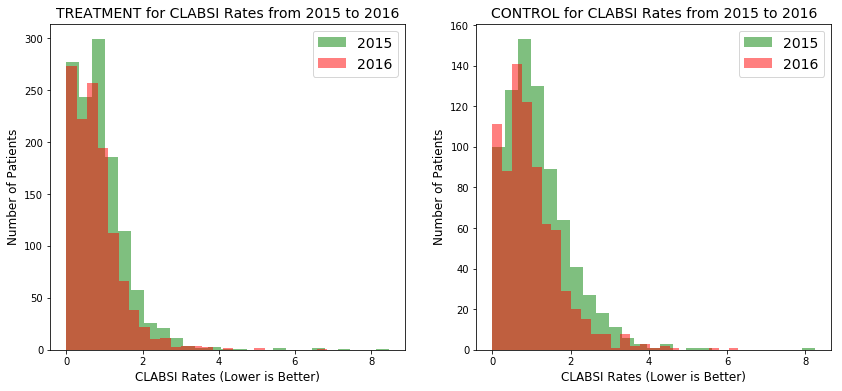

In [40]:
plt.figure(figsize=(14, 6))
plt.subplot(121)
plt.hist(treatment.sir15, color='g', alpha=0.5, bins=25, label='2015')
plt.hist(treatment.sir16, color='r', alpha=0.5, bins=25, label='2016')
plt.title('TREATMENT for CLABSI Rates from 2015 to 2016', fontsize=14)
plt.xlabel('CLABSI Rates (Lower is Better)', fontsize=12)
plt.ylabel('Number of Patients', fontsize=12)
plt.legend(loc=0, fontsize=14)
plt.subplot(122)
plt.hist(control.sir15, color='g', alpha=0.5, bins=25, label='2015')
plt.hist(control.sir16, color='r', alpha=0.5, bins=25, label='2016')
plt.title('CONTROL for CLABSI Rates from 2015 to 2016', fontsize=14)
plt.xlabel('CLABSI Rates (Lower is Better)', fontsize=12)
plt.ylabel('Number of Patients', fontsize=12)
plt.legend(loc=0, fontsize=14)
plt.show()

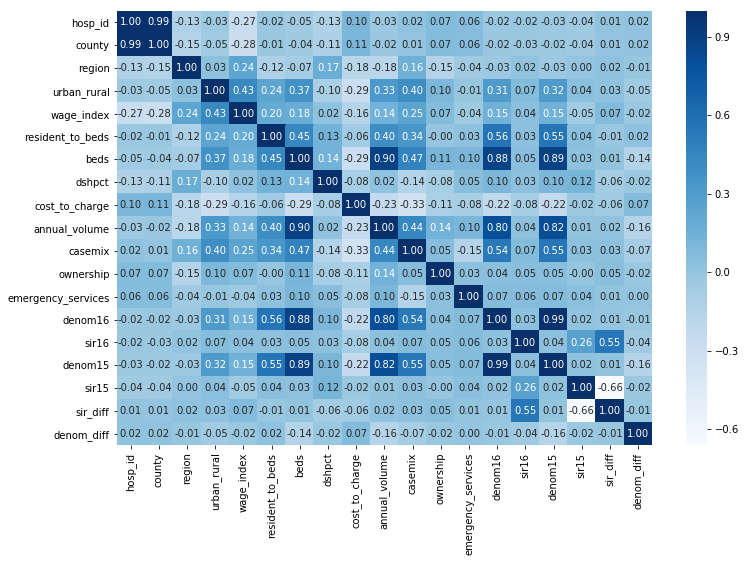

In [41]:
plt.figure(figsize=(12, 8))
sns.heatmap(treatment.corr(), cmap='Blues', annot=True, fmt=".2f")

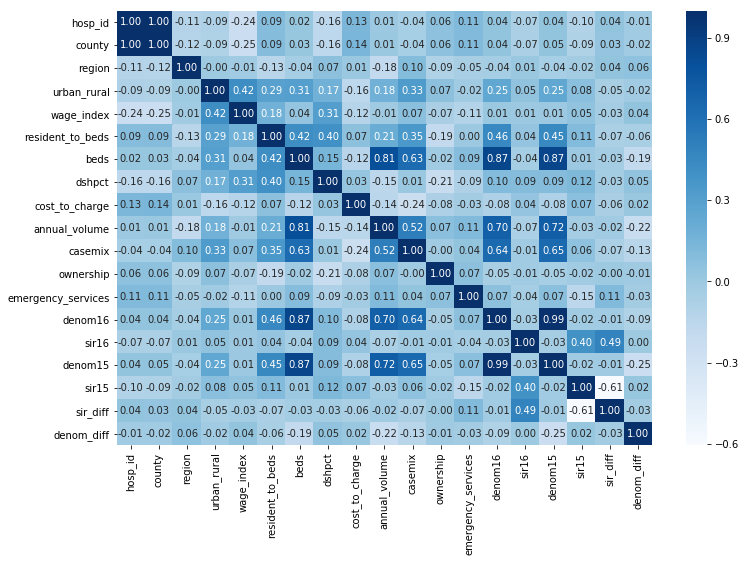

In [42]:
plt.figure(figsize=(12, 8))
sns.heatmap(control.corr(), cmap='Blues', annot=True, fmt=".2f")

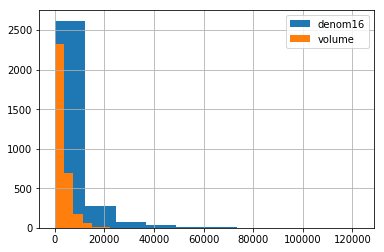

In [43]:
df.denom16.hist(label='denom16')
df.annual_volume.hist(label='volume')
plt.legend()

In [44]:
print("Treatment Mean", treatment.sir_diff.mean())
print("Total Mean", df.sir_diff.mean())
print("Control Mean", control.sir_diff.mean())

Treatment Mean -0.11856999999999994
Total Mean -0.13834910941475823
Control Mean -0.1676715039577837


In [45]:
print("Treatment Before & After: ", (round(treatment.sir15.mean(), 3), round(treatment.sir16.mean(), 3)))
print("Total Before & After: ", round(df.sir15.mean(), 3), round(df.sir16.mean(), 3))
print("Control Before & After: ", round(control.sir15.mean(), 3), round(control.sir16.mean(), 3))

Treatment Before & After:  (0.892, 0.773)
Total Before & After:  0.994 0.86
Control Before & After:  1.16 1.001


In [46]:
len(df), len(treatment), len(control)

(3263, 2056, 954)

In [47]:
df.annual_volume.mean(), treatment.annual_volume.mean(), control.annual_volume.mean()

(2961.9840637450197, 2971.397373540856, 3653.5670859538786)

In [48]:
df.wage_index.mean(), treatment.wage_index.mean(), control.wage_index.mean()

(0.9781430278884466, 0.9769247568093433, 1.0012584905660342)

In [49]:
df.resident_to_beds.mean(), treatment.resident_to_beds.mean(), control.resident_to_beds.mean()

(0.06418559607722946, 0.0460140077821012, 0.11440607966457024)

---
## Modeling
Remove the following columns:
- `hosp_id`
- `county`
Drop Null Values from 

In [50]:
treatment = treatment.drop(columns=['hosp_id', 'county', 'emergency_services'])
control = control.drop(columns=['hosp_id', 'county', 'emergency_services'])

## Dropping Null Values

Unfortunately there are a high number of null values in the important categories of `sir15` and `sir16` for both the experimental group as well as the control group.  Due to the inability to find a replacement for either group, 

In [51]:
treatment["all"] = ""
treatment.head()

,region,urban_rural,wage_index,resident_to_beds,beds,dshpct,cost_to_charge,annual_volume,casemix,ownership,denom16,sir16,denom15,sir15,sir_diff,denom_diff,all
0,5,1,0.7704,0.0000,408,0.29862,0.197,7939,1.750650,5,7264.0,0.688,7117.0,2.816,-2.128,147.0,
1,5,0,0.6973,0.0000,29,0.36918,0.493,285,0.928597,8,55.0,NaN,28.0,NaN,NaN,27.0,
2,5,2,0.8128,0.0525,279,0.22260,0.213,4092,1.719994,9,10339.0,1.413,12366.0,0.778,0.635,-2027.0,
3,5,0,0.7091,0.0000,97,0.28320,0.152,1303,1.273982,8,1029.0,NaN,497.0,NaN,NaN,532.0,
4,5,2,0.8128,0.0000,193,0.23648,0.176,3485,1.554720,9,7736.0,0.780,8088.0,0.833,-0.053,-352.0,


In [52]:
df['all'] = ""
df.treatment = df.treatment.replace({0.0:False, 1.0:True})

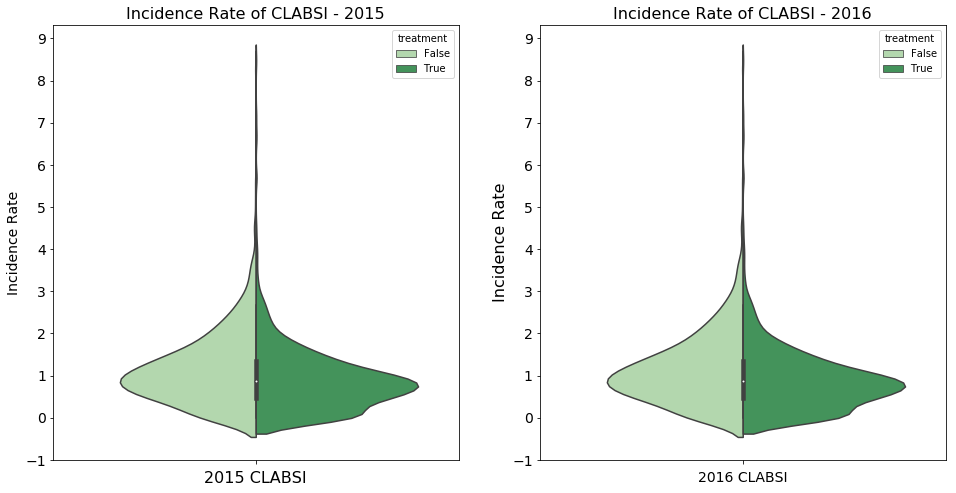

In [53]:
plt.figure(figsize=(16,8))
plt.subplot(121)
sns.violinplot(x="all", y="sir15", hue="treatment", data=df, split=True, palette='Greens')
plt.text
plt.xlabel("2015 CLABSI", fontsize=16)
plt.ylabel("Incidence Rate", fontsize=14)
plt.title('Incidence Rate of CLABSI - 2015', fontsize=16)
plt.yticks(ticks=range(-1, 10), fontsize=14)
plt.subplot(122)
sns.violinplot(x="all", y="sir15", hue="treatment", data=df, split=True, palette='Greens')
plt.xlabel("2016 CLABSI", fontsize=14)
plt.ylabel("Incidence Rate", fontsize=16)
plt.title('Incidence Rate of CLABSI - 2016', fontsize=16)
plt.yticks(ticks=range(-1, 10), fontsize=14)
plt.savefig('dual_violin.png', edgecolor='k')

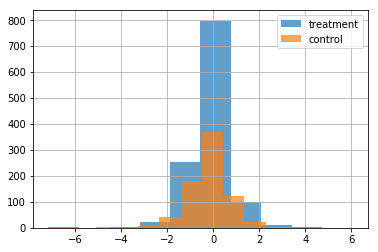

In [54]:
treatment.sir_diff.hist(label="treatment", alpha=0.7)
control.sir_diff.hist(label="control", alpha=0.7)
plt.legend()

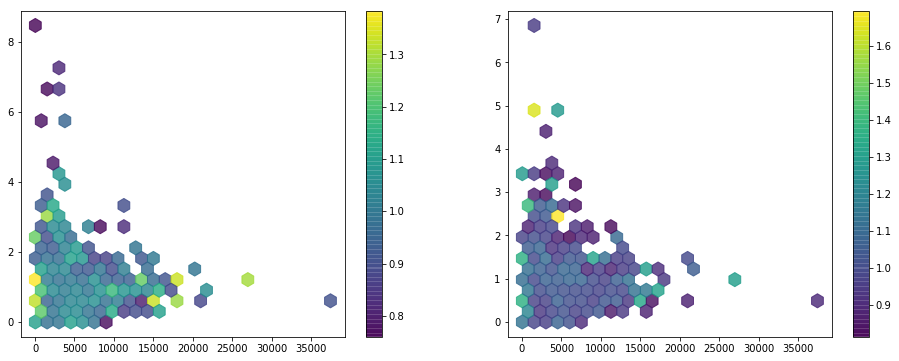

In [55]:
x = treatment.annual_volume
c = treatment.wage_index
y1 = treatment.sir15
y2 = treatment.sir16
plt.figure(figsize=(16,6))
plt.subplot(121)
plt.hexbin(x, y1, C=c, gridsize=25, label='2015', alpha=0.8)
plt.colorbar()
plt.subplot(122)
plt.hexbin(x, y2, C=c, gridsize=25, label='2016', alpha=0.8)
plt.colorbar()
plt.show()

In [56]:
df['days15_norm'] = df.denom15 / df.annual_volume
df['days16_norm'] = df.denom16 / df.annual_volume
df.head()

,hosp_id,county,region,urban_rural,wage_index,resident_to_beds,beds,dshpct,cost_to_charge,annual_volume,...,denom16,sir16,denom15,sir15,treatment,sir_diff,denom_diff,all,days15_norm,days16_norm
0,10001,1340,5,1,0.7704,0.0,408,0.29862,0.197,7939,...,7264.0,0.688,7117.0,2.816,True,-2.128,147.0,,0.896461,0.914977
1,10005,1470,5,0,0.8212,0.0,204,0.27654,0.303,4036,...,2464.0,0.000,2786.0,2.114,False,-2.114,-322.0,,0.690287,0.610505
2,10006,1380,5,1,0.7325,0.0,358,0.24028,0.186,5132,...,8711.0,1.563,11159.0,0.639,False,0.924,-2448.0,,2.174396,1.697389
3,10007,1190,5,0,0.6874,0.0,78,0.19347,0.368,645,...,282.0,NaN,48.0,NaN,False,NaN,234.0,,0.074419,0.437209
4,10008,1200,5,0,0.6973,0.0,29,0.36918,0.493,285,...,55.0,NaN,28.0,NaN,True,NaN,27.0,,0.098246,0.192982


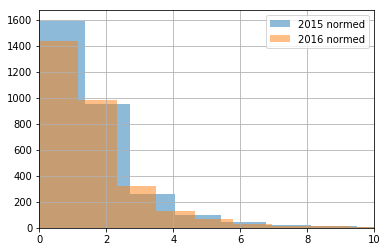

In [57]:
df.days15_norm.hist(bins=80, alpha=0.5, label="2015 normed")
df.days16_norm.hist(bins=80, alpha=0.5, label="2016 normed")
plt.xlim(0, 10)
plt.legend();

In [58]:
sir = df.sir_diff.std()
denom = df.denom_diff.std()
denom_high = df.denom_diff.mean() + denom*3
denom_low = df.denom_diff.mean() - denom*3
sir_high = df.sir_diff.mean() + sir*3
sir_low = df.sir_diff.mean() - sir*3

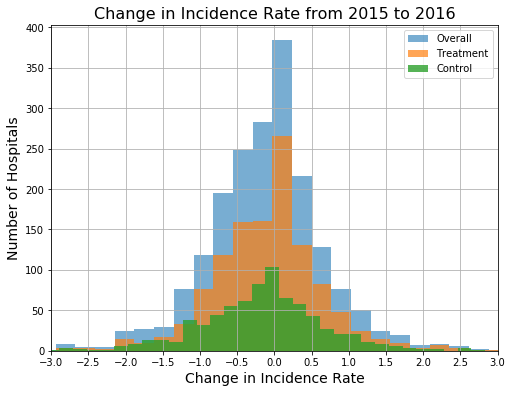

In [59]:
plt.figure(figsize=(8,6))
df.sir_diff.hist(bins=50, alpha=0.6, label="Overall")
treatment.sir_diff.hist(bins=50, alpha=0.7, label="Treatment")
control.sir_diff.hist(bins=50, alpha=0.8, label="Control")
plt.xlabel("Change in Incidence Rate", fontsize=14)
plt.xlim(sir_low, sir_high)
plt.xticks(np.linspace(-3, 3, 13))
plt.title("Change in Incidence Rate from 2015 to 2016", fontsize=16)
plt.ylabel("Number of Hospitals", fontsize=14)
plt.legend()
plt.savefig("sir_chg.png")

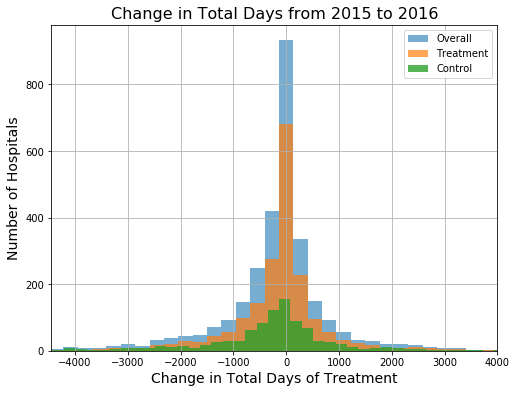

In [60]:
plt.figure(figsize=(8,6))
df.denom_diff.hist(bins=100, alpha=0.6, label="Overall")
treatment.denom_diff.hist(bins=100, alpha=0.7, label="Treatment")
control.denom_diff.hist(bins=100, alpha=0.8, label="Control")
plt.xlabel("Change in Total Days of Treatment", fontsize=14)
plt.xlim(denom_low, denom_high)
plt.title("Change in Total Days from 2015 to 2016", fontsize=16)
plt.ylabel("Number of Hospitals", fontsize=14)
plt.legend()
plt.savefig("denom_chg.png")

In [61]:
treatment = df[df['treatment'] == 1]
treatment = treatment.reset_index(drop=True)
treatment.drop(columns='treatment', inplace=True)
control = df[df['treatment'] == 0]
control = control.reset_index(drop=True)
control.drop(columns='treatment', inplace=True)

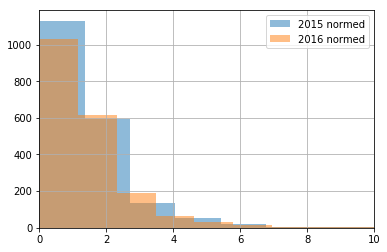

In [62]:
treatment.days15_norm.hist(bins=80, alpha=0.5, label="2015 normed")
treatment.days16_norm.hist(bins=80, alpha=0.5, label="2016 normed")
plt.xlim(0, 10)
plt.legend();

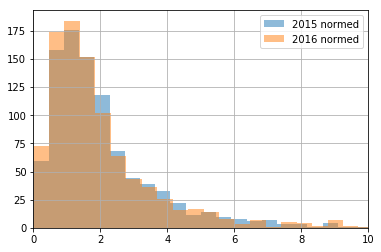

In [63]:
control.days15_norm.hist(bins=80, alpha=0.5, label="2015 normed")
control.days16_norm.hist(bins=80, alpha=0.5, label="2016 normed")
plt.xlim(0, 10)
plt.legend();

In [59]:
%notify

<IPython.core.display.Javascript object>